### Importação dos dados



In [310]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [303]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=loja)

https://docs.google.com/spreadsheets/d/1_y66XKMPoSfM7kD-m5Q-36OCwGo1L9yiPWtTtvUawG0/edit#gid=0


#0. Análise das vendas


In [304]:
# Total de vendas para cada ano para a loja 1 retirando apenas o ano da data de compra

loja2['Data da Compra'] = pd.to_datetime(loja2['Data da Compra'],format='%d/%m/%Y')
loja2['Ano'] = loja2['Data da Compra'].dt.year

vendas_por_ano = loja2['Ano'].value_counts()

print(vendas_por_ano)

Ano
2021    759
2022    708
2020    700
2023    192
Name: count, dtype: int64


In [305]:
# Total de vendas para cada ano para a loja 1 retirando apenas o ano da data de compra

lojas = [loja, loja2, loja3, loja4]
nome_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

vendas_por_ano = {}

for i in range(len(lojas)):
  lojas[i]['Data da Compra'] = pd.to_datetime(lojas[i]['Data da Compra'],format='%d/%m/%Y')
  lojas[i]['Ano'] = lojas[i]['Data da Compra'].dt.year

vendas_por_ano = {nome_lojas[i] : lojas[i]['Ano'].value_counts() for i in range(len(lojas))}

print(vendas_por_ano)

{'Loja 1': Ano
2021    739
2020    715
2022    713
2023    192
Name: count, dtype: int64, 'Loja 2': Ano
2021    759
2022    708
2020    700
2023    192
Name: count, dtype: int64, 'Loja 3': Ano
2021    740
2022    740
2020    701
2023    178
Name: count, dtype: int64, 'Loja 4': Ano
2020    745
2021    744
2022    712
2023    157
Name: count, dtype: int64}


In [306]:
# soma do preço por ano para a loja2

preço_por_ano = {nome_lojas[i] : lojas[i].groupby('Ano')['Preço'].sum() for i in range(len(lojas))}

print(preço_por_ano)


{'Loja 1': Ano
2020    491911.51
2021    482829.91
2022    422086.24
2023    137681.46
Name: Preço, dtype: float64, 'Loja 2': Ano
2020    427288.25
2021    468288.89
2022    477635.56
2023    115246.36
Name: Preço, dtype: float64, 'Loja 3': Ano
2020    428943.09
2021    483938.91
2022    467250.70
2023     83892.33
Name: Preço, dtype: float64, 'Loja 4': Ano
2020    441129.52
2021    463763.27
2022    402961.23
2023     76643.56
Name: Preço, dtype: float64}


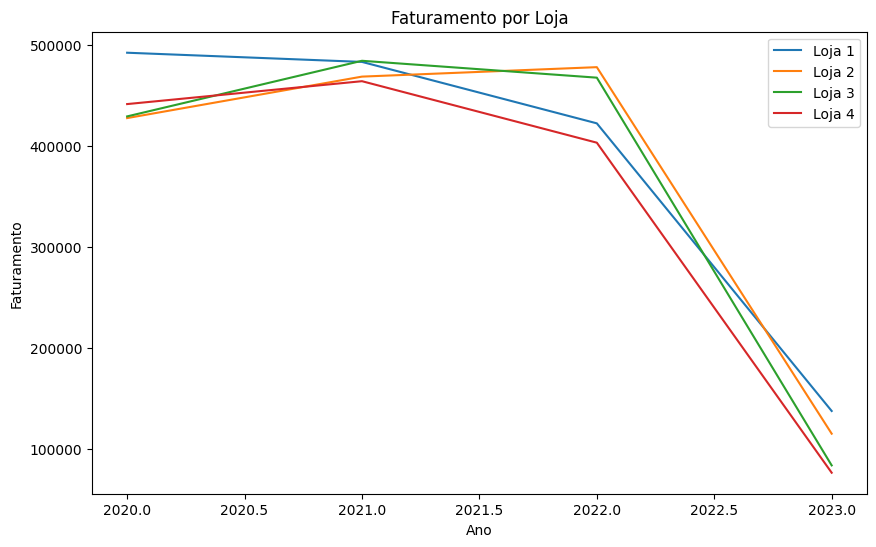

In [307]:
# grafico de barras do comparativo de lojas mostrando o faturamento por ano

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

for i, loja in enumerate(nome_lojas):
  plt.plot(preço_por_ano[loja].index, preço_por_ano[loja].values, label=loja)

  plt.xlabel('Ano')
  plt.ylabel('Faturamento')
  plt.title('Faturamento por Loja')
  plt.legend()

plt.show()

#1. Análise do faturamento


In [311]:
# Faturamento total por loja

lojas = [loja, loja2, loja3, loja4]
faturamentos_lojas = []

for i in range(len(lojas)):
  faturamentos_lojas.append(float(lojas[i]["Preço"].sum()))
  print(f'O faturamento total da loja {i+1} foi: R$ {lojas[i]["Preço"].sum():,.2f}')

print(f'\n{faturamentos_lojas}')

O faturamento total da loja 1 foi: R$ 1,534,509.12
O faturamento total da loja 2 foi: R$ 1,488,459.06
O faturamento total da loja 3 foi: R$ 1,464,025.03
O faturamento total da loja 4 foi: R$ 1,384,497.58

[1534509.12, 1488459.06, 1464025.03, 1384497.58]


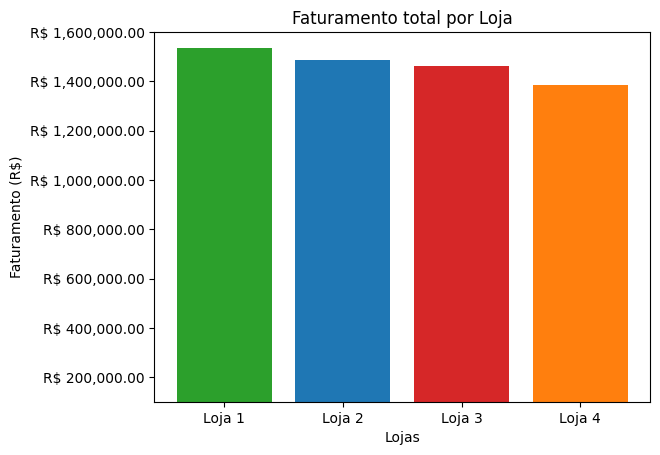

In [312]:
# Gráfico de barras para o faturamento de cada loja

nome_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange']

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.bar(nome_lojas, faturamentos_lojas, color=bar_colors)

plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento total por Loja')

plt.ylim(100000, 1600000)

def formato_real(x, pos):
    return f'R$ {x:,.2f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formato_real))

plt.show()

In [313]:
# Cálculo do faturamento efetivo

faturamento_efetivo_lojas = []

for i in range(len(lojas)):
  faturamento_efetivo = float(lojas[i]["Preço"].sum() - lojas[i]["Frete"].sum())
  faturamento_efetivo_lojas.append(faturamento_efetivo)
  print(f'O faturamento efetivo da loja {i+1} foi: R$ {faturamento_efetivo:,.2f}')

print(f'\n{faturamento_efetivo_lojas}')



O faturamento efetivo da loja 1 foi: R$ 1,452,671.15
O faturamento efetivo da loja 2 foi: R$ 1,409,144.90
O faturamento efetivo da loja 3 foi: R$ 1,386,002.37
O faturamento efetivo da loja 4 foi: R$ 1,310,741.70

[1452671.1522043084, 1409144.9019873552, 1386002.368777357, 1310741.7048810173]


# 2. Vendas por Categoria


In [314]:
# Categorias de produtos

categorias = list(set(loja["Categoria do Produto"]))
print(f'São {len(categorias)} categorias: {categorias}')

São 8 categorias: ['moveis', 'esporte e lazer', 'brinquedos', 'eletrodomesticos', 'livros', 'utilidades domesticas', 'instrumentos musicais', 'eletronicos']


In [315]:
# Agrupar os dados pela categoria do produto

loja1_por_categoria = loja['Categoria do Produto'].value_counts()
loja2_por_categoria = loja2['Categoria do Produto'].value_counts()
loja3_por_categoria = loja3['Categoria do Produto'].value_counts()
loja4_por_categoria = loja4['Categoria do Produto'].value_counts()

vendas_por_categoria = {
    'Loja 1': loja1_por_categoria,
    'Loja 2': loja2_por_categoria,
    'Loja 3': loja3_por_categoria,
    'Loja 4': loja4_por_categoria
}

for loja, categoria in vendas_por_categoria.items():
  print(f'{loja}:')
  print()
  print(categoria)
  print()

Loja 1:

Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2:

Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3:

Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4:

Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer 

In [316]:
# usando comprehension

# lista_lojas_categoria = [lojas[i]['Categoria do Produto'].value_counts() for i in range(len(lojas))]

# vendas_por_categoria_2 = { loja : vendas_categoria for loja, vendas_categoria in zip(nome_lojas, lista_lojas_categoria)}

# for loja, categoria in vendas_por_categoria_2.items():
#   print(f'{loja}:')
#   print()
#   print(categoria)
#   print()

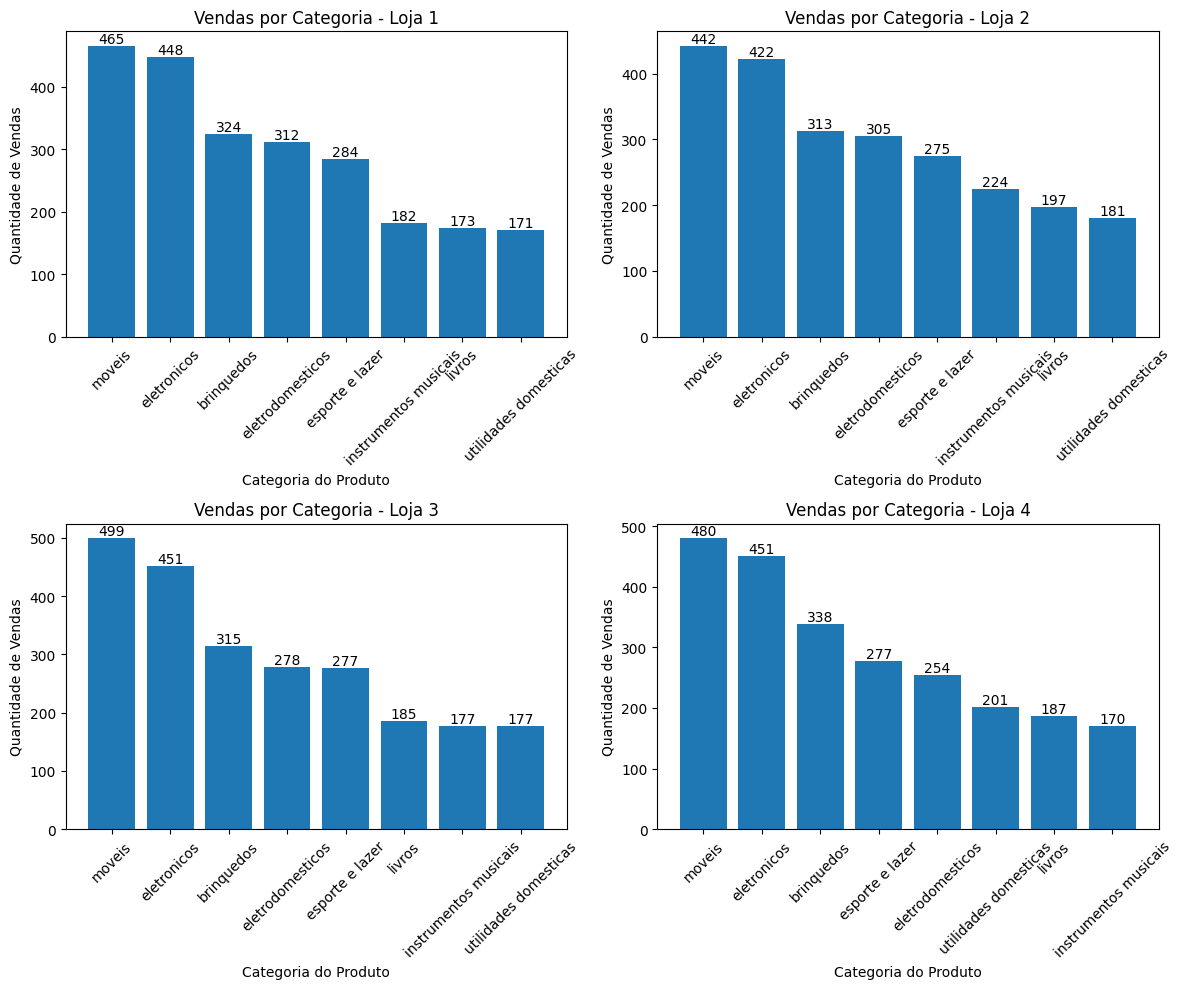

In [317]:
# Gráfico de vendas por categoria por loja

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, loja in enumerate(nome_lojas):
  row = i // 2
  col = i % 2
  ax = axs[row, col]

  ax.bar(vendas_por_categoria[loja].index, vendas_por_categoria[loja].values)
  ax.bar_label(ax.containers[0])
  ax.set_xlabel('Categoria do Produto')
  ax.set_ylabel('Quantidade de Vendas')

  ax.set_title(f'Vendas por Categoria - {loja}')
  ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

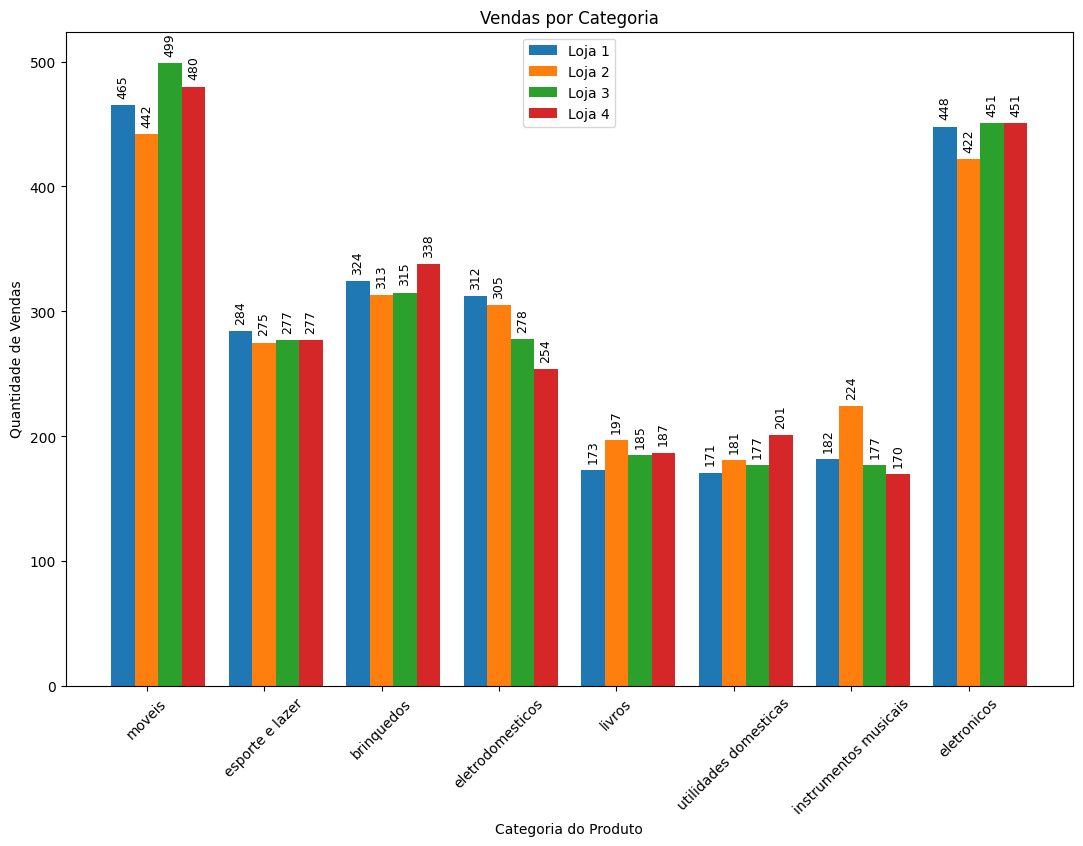

In [318]:
# grafico do comparativo de lojas por categoria

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

x = np.arange(len(categorias))
width = 0.2
multiplier = 0.2

fig, ax = plt.subplots(figsize=(13, 8.5))

for i, loja in enumerate(nome_lojas):

  offset = width * multiplier
  y = [vendas_por_categoria[loja][categoria] for categoria in categorias]
  rects = ax.bar(x + i * width, y, width, label=loja)
  ax.bar_label(rects, padding=5, rotation=90, fontsize=9)
  multiplier += 1

ax.set_xlabel('Categoria do Produto')
ax.set_ylabel('Quantidade de Vendas')
ax.set_title('Vendas por Categoria')

ax.set_xticks(x + width)
ax.tick_params(axis='x', rotation=45)
ax.set_xticklabels(categorias)
ax.legend()

plt.show()

In [319]:
# Contar quantas vendas cada categoria do produto teve

Total_vendas_por_categoria = {categoria: sum([loja[loja['Categoria do Produto'] == categoria].shape[0] for loja in lojas]) for categoria in categorias}

print(Total_vendas_por_categoria)

{'moveis': 1886, 'esporte e lazer': 1113, 'brinquedos': 1290, 'eletrodomesticos': 1149, 'livros': 742, 'utilidades domesticas': 730, 'instrumentos musicais': 753, 'eletronicos': 1772}


In [320]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



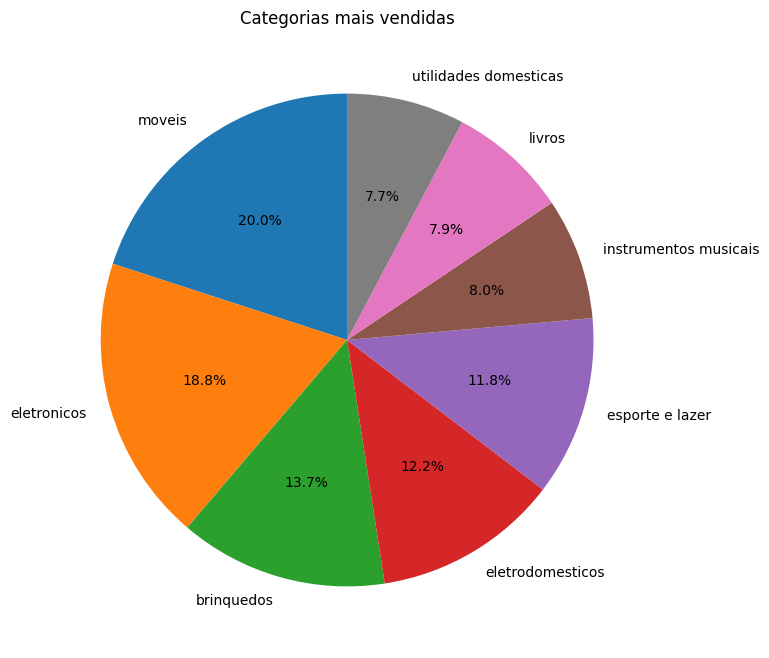

In [321]:
# Gráfico de pizza para as categorias mais vendidas

import matplotlib.pyplot as plt

categorias_mais_vendidas = sorted(Total_vendas_por_categoria, key=Total_vendas_por_categoria.get, reverse=True)
categorias_mais_vendidas_valores = [Total_vendas_por_categoria[categoria] for categoria in categorias_mais_vendidas]

plt.figure(figsize=(8, 8))
plt.pie(categorias_mais_vendidas_valores, labels=categorias_mais_vendidas, autopct='%1.1f%%', startangle=90)
plt.title('Categorias mais vendidas')
plt.show()

✨ Essa análise é essencial para entender o perfil de vendas de cada unidade e pode ajudar o Senhor João a tomar decisões importantes no negócio!

# 3. Média de Avaliação das Lojas

In [322]:
# Calcular a média das avaliações

media_avaliacoes_lojas = []

for i in range(len(lojas)):
  media_avaliacoes_lojas.append(float(lojas[i]["Avaliação da compra"].mean()))
  print(f'A média de Avaliação da compra da loja {i+1} foi: {lojas[i]["Avaliação da compra"].mean():,.2f}')

print(f'\n{media_avaliacoes_lojas}')


A média de Avaliação da compra da loja 1 foi: 3.98
A média de Avaliação da compra da loja 2 foi: 4.04
A média de Avaliação da compra da loja 3 foi: 4.05
A média de Avaliação da compra da loja 4 foi: 4.00

[3.976685036032217, 4.037303942348453, 4.048325561678677, 3.9957591178965224]


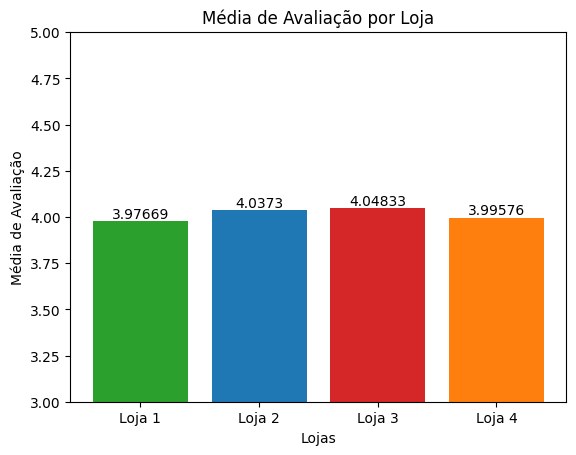

In [323]:
# Gráfico de barras comparativo das avaliações

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.bar(nome_lojas, media_avaliacoes_lojas, color=bar_colors)
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')
plt.ylim(3, 5)
plt.gca().yaxis
plt.bar_label(plt.gca().containers[0])
plt.show()

Como anda a satisfação dos clientes?

✨ Uma média mais alta pode indicar um bom atendimento, entrega rápida, produtos de qualidade… ou tudo isso junto! 👀

Já uma média mais baixa pode levantar alertas importantes. 📉

# 4. Produtos Mais e Menos Vendidos

In [324]:
# Contar quantas vezes cada produto aparece nos dados de cada loja

lista_produtos_lojas = [lojas[i]['Produto'].value_counts() for i in range(len(lojas))]

vendas_por_produto = { loja : vendas_produto for loja, vendas_produto in zip(nome_lojas, lista_produtos_lojas)}

for loja, produto in vendas_por_produto.items():
  print(f'{loja}:')
  print()
  print(produto)
  print()

Loja 1:

Produto
Micro-ondas                    60
TV Led UHD 4K                  60
Guarda roupas                  60
Secadora de roupas             58
Cômoda                         56
Blocos de montar               56
Bola de basquete               55
Bicicleta                      54
Copo térmico                   54
Geladeira                      54
Impressora                     54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Xadrez de madeira              49
Celular Plus X42               49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Cama box                       44
Kit banquetas                  44
Smart TV                       44
Cama king                      

In [325]:
# Selecionar os 3 produtos mais vendidos e os 3 menos vendidos de cada loja

produtos_mais_vendidos = {}
produtos_menos_vendidos = {}

for loja, produto in vendas_por_produto.items():
  produtos_mais_vendidos[loja] = produto.head(3)
  produtos_menos_vendidos[loja] = produto.tail(3)

  print(f'{loja}:')
  print()
  print(f'Produtos mais vendidos: {produtos_mais_vendidos[loja]}')
  print()
  print(f'Produtos menos vendidos: {produtos_menos_vendidos[loja]}')
  print()

Loja 1:

Produtos mais vendidos: Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60
Name: count, dtype: int64

Produtos menos vendidos: Produto
Panela de pressão    35
Headset              33
Celular ABXY         33
Name: count, dtype: int64

Loja 2:

Produtos mais vendidos: Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Name: count, dtype: int64

Produtos menos vendidos: Produto
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64

Loja 3:

Produtos mais vendidos: Produto
Kit banquetas     57
Mesa de jantar    56
Cama king         56
Name: count, dtype: int64

Produtos menos vendidos: Produto
Mochila             36
Micro-ondas         36
Blocos de montar    35
Name: count, dtype: int64

Loja 4:

Produtos mais vendidos: Produto
Cama box                   62
Faqueiro                   59
Dashboards com Power BI    56
Name: count, dtype: int64

Produtos menos vendidos: Prod

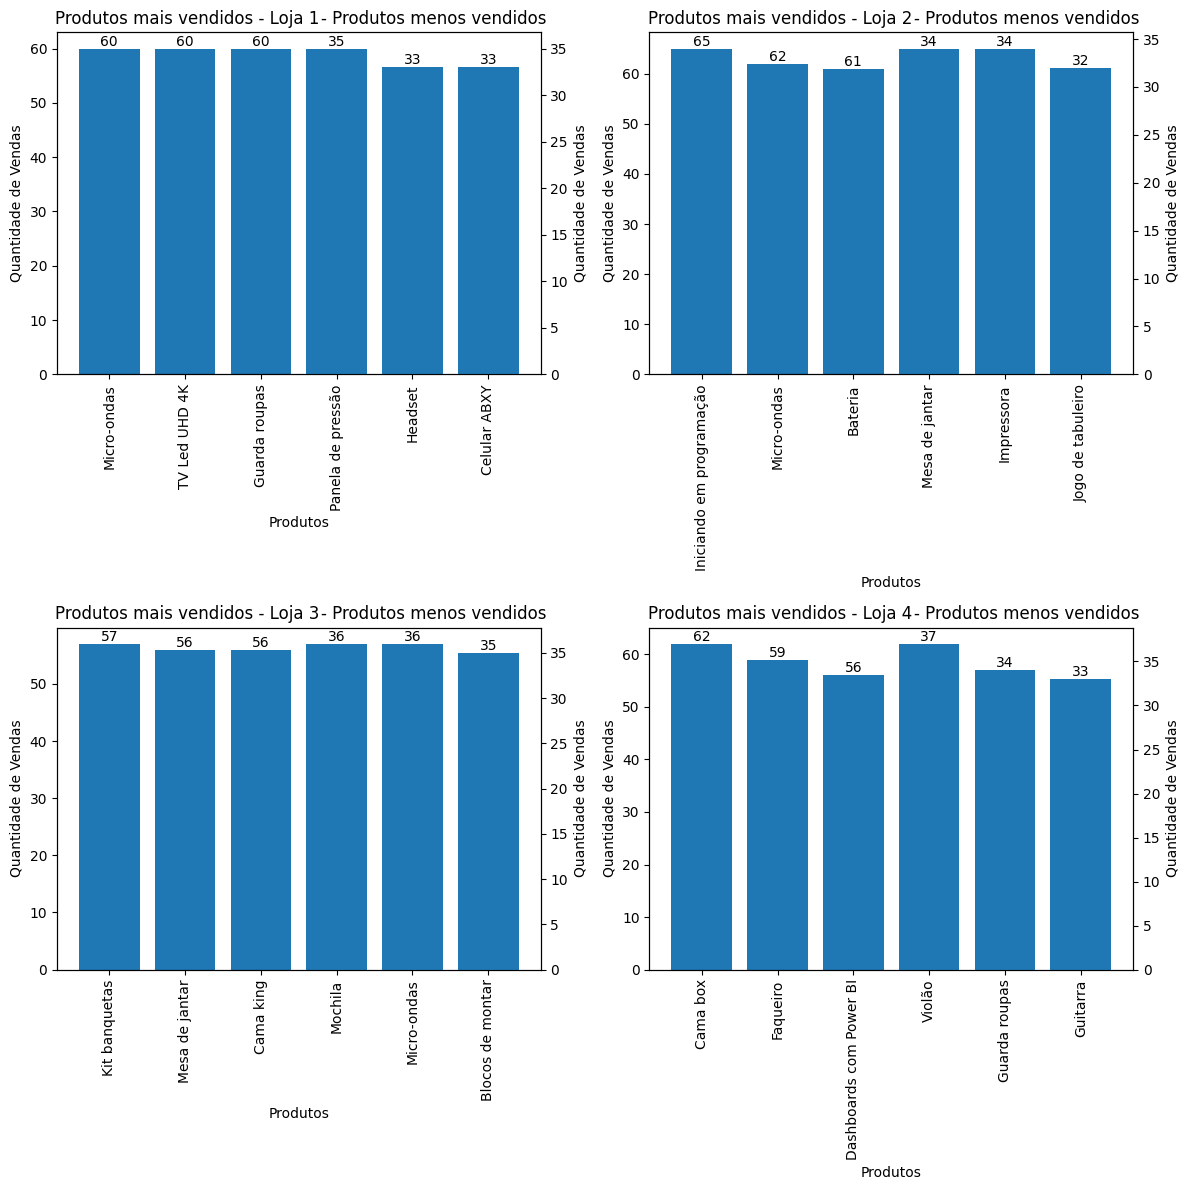

In [326]:
# Gráfico para os produtos mais vendidos e menos vendidos

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, loja in enumerate(nome_lojas):
  row = i // 2
  col = i % 2
  ax = axs[row, col]

  ax.bar(produtos_mais_vendidos[loja].index, produtos_mais_vendidos[loja].values)
  ax.bar_label(ax.containers[0])
  ax.set_xlabel('Produtos')
  ax.set_ylabel('Quantidade de Vendas')

  ax.set_title(f'Produtos mais vendidos - {loja}')
  ax.title.set_position([0.27, 1.05])
  ax.tick_params(axis='x', rotation=90)

  ax2 = ax.twinx()
  ax2.bar(produtos_menos_vendidos[loja].index, produtos_menos_vendidos[loja].values)
  ax2.bar_label(ax2.containers[0])
  ax2.set_ylabel('Quantidade de Vendas')
  ax2.set_title(f'- Produtos menos vendidos')
  ax2.title.set_position([0.78, 1.05])
  ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [327]:
# Calcular o custo médio de frete por loja

media_frete_lojas = []

for i in range(len(lojas)):

  media_frete_lojas.append(float(lojas[i]["Frete"].mean()))

  print(f'O custo médio de frete da loja {i+1} foi: R$ {lojas[i]["Frete"].mean():,.2f}')

print(f'\n{media_frete_lojas}')

O custo médio de frete da loja 1 foi: R$ 34.69
O custo médio de frete da loja 2 foi: R$ 33.62
O custo médio de frete da loja 3 foi: R$ 33.07
O custo médio de frete da loja 4 foi: R$ 31.28

[34.69180491551149, 33.62194065817927, 33.07446427411743, 31.278997081841727]


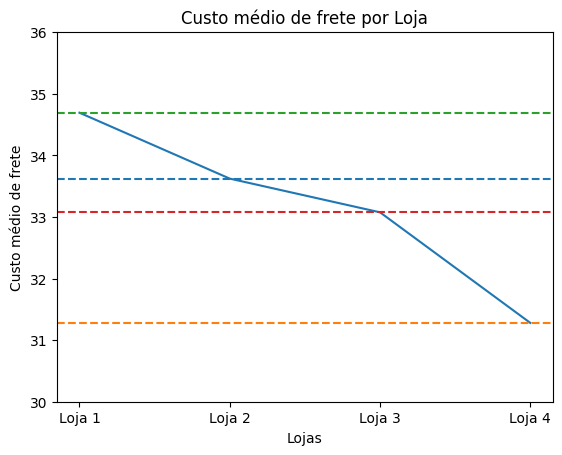

In [328]:
# Gráfico de linha para o frete médio por loja

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.plot(nome_lojas, media_frete_lojas)
plt.xlabel('Lojas')
plt.ylabel('Custo médio de frete')
plt.title('Custo médio de frete por Loja')
plt.ylim(30, 36)
plt.axhline(media_frete_lojas[0], color='tab:green', linestyle='--')
plt.axhline(media_frete_lojas[1], color='tab:blue', linestyle='--')
plt.axhline(media_frete_lojas[2], color='tab:red', linestyle='--')
plt.axhline(media_frete_lojas[3], color='tab:orange', linestyle='--')
plt.show()

Você já parou pra pensar quanto, em média, está sendo gasto com frete em cada loja? 🤔

💡 Essa análise pode revelar muito sobre a logística e até sobre a experiência do cliente!

✨ Será que a loja com maior faturamento também é a que mais gasta com frete?

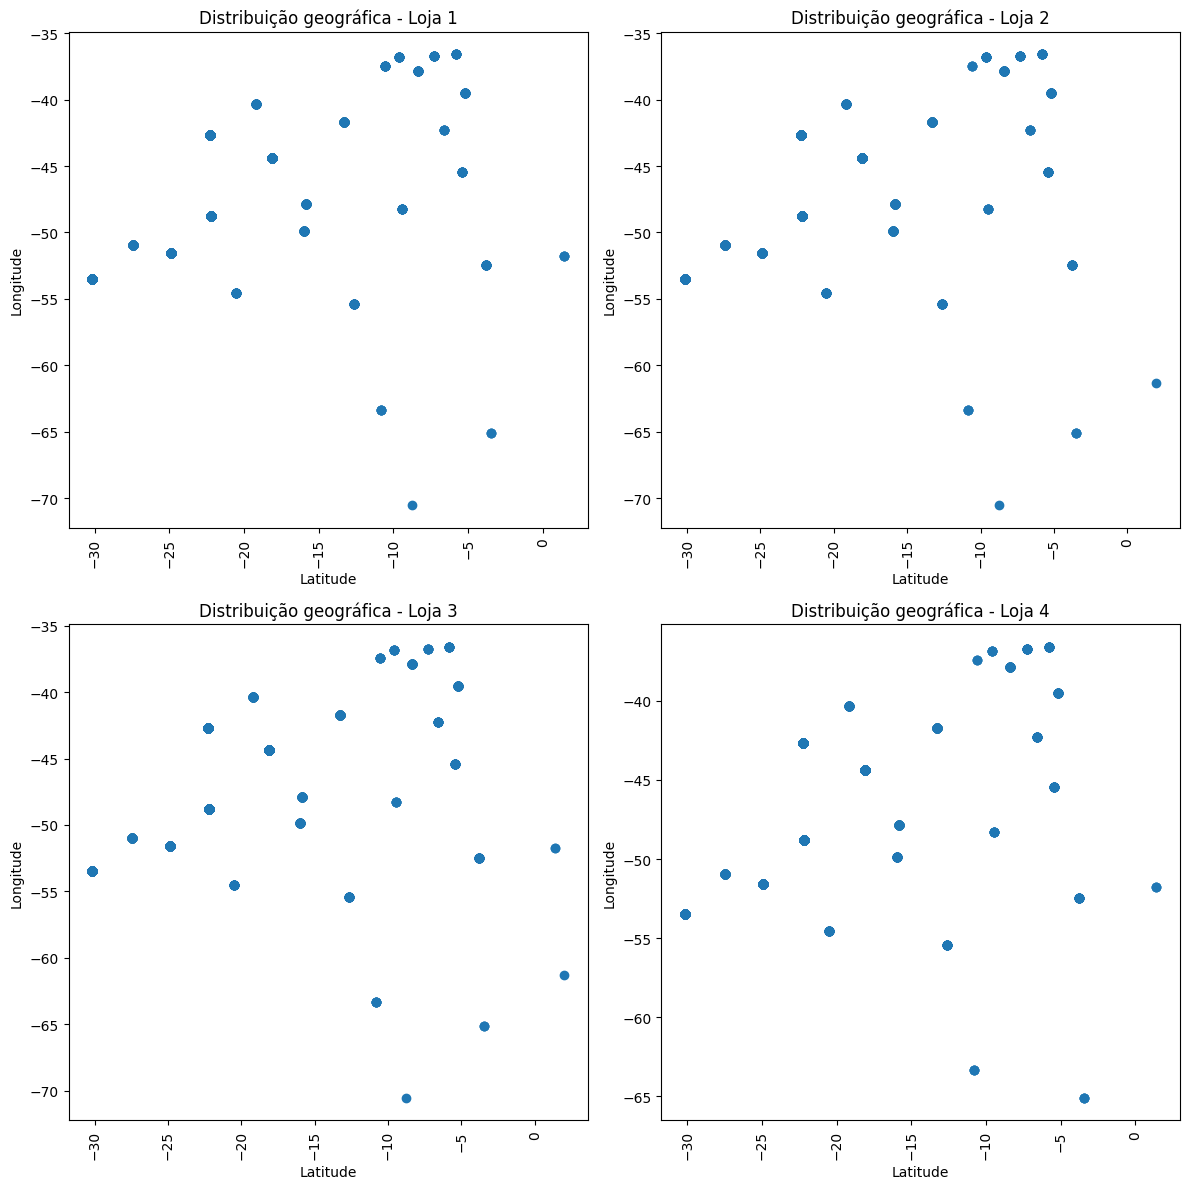

In [329]:
# gráfico com a distribuição geográfica dos produtos vendidos

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, loja in enumerate(nome_lojas):
  row = i // 2
  col = i % 2
  ax = axs[row, col]
  ax.scatter(lojas[i]['lat'], lojas[i]['lon'])
  ax.set_xlabel('Latitude')
  ax.set_ylabel('Longitude')
  ax.set_title(f'Distribuição geográfica - {loja}')
  ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# 6. Análise do caso - Relatório

# **Faturamento total**
Podemos verificar pelo gráfico de faturamento total que a loja 4 teve o menor faturamento, no geral, seguido pelas lojas 3, 2 e 1.


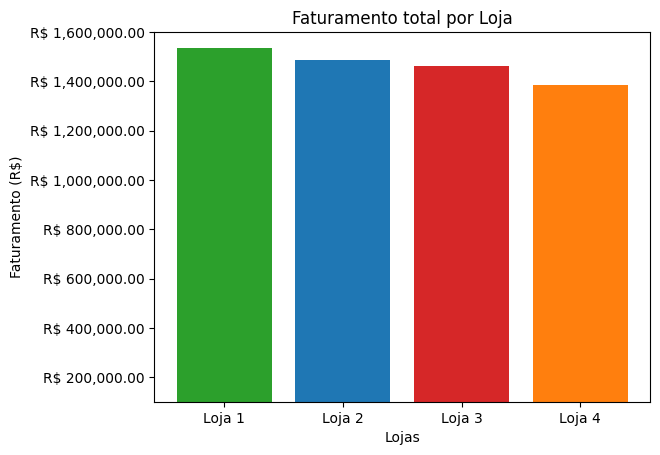


Podemos observar ainda que ao longo dos anos as lojas vem perdendo faturamento, em uma tendência de queda que recomenda-se ser avaliada para que as lojas restantes voltem a apresentar um crescimento no faturamento.

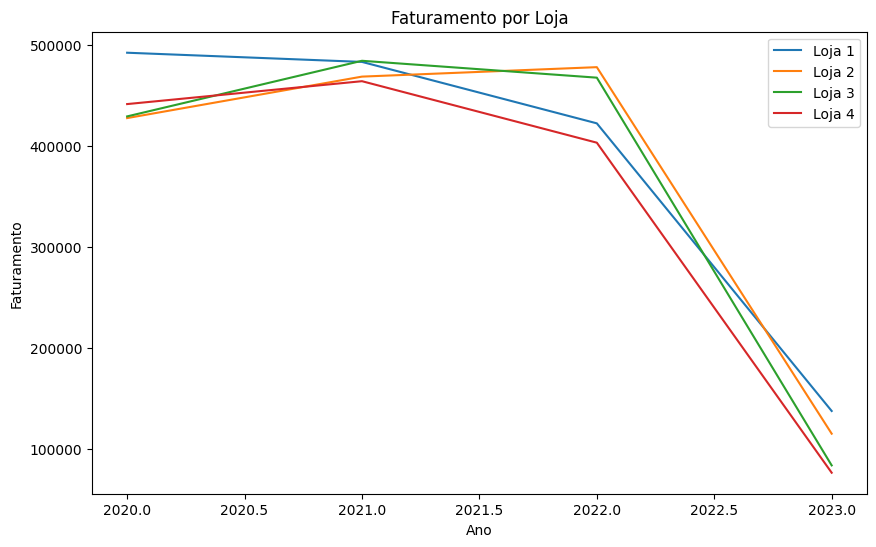

# **Frete Médio por Loja**

A loja 1 teve o custo médio de frete mais elevado provavelmente devido à sua logística que é um ponto que deve ser entendido mais a fundo para que sejam reduzidos custos.

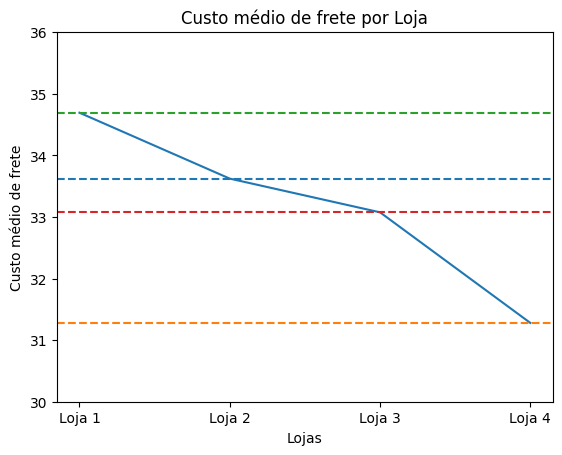

Apesar do custo médio elevado, no panorama geral, podemos perceber que a loja 1 ainda tem vantagem competitiva devido ao seu faturamento. Ao calcularmos o faturamento efetivo, retirando o custo do frete do faturamento total, percebemos que a tendência do faturamento total se mantém, com a loja 4 tendo o pior desempenho no geral.


---


Para o Faturamento Total (FT) e o Faturamento Efetivo (FE) indo da loja 1 à loja 4 temos:

```
FT: ​​1534509.12, 1488459.06, 1464025.03, 1384497.58
FE: 1452671.15, 1409144.90, 1386002.36, 1310741.70
```
---





# **Vendas por Categoria**

São 8 categorias:

moveis, esporte e lazer, brinquedos, eletrodomesticos, livros, utilidades domesticas, instrumentos musicais e eletronicos.

Com as gategorias mais vendidas sendo móveis, eletrônicos e brinquedos e as menos vendidas sendo utilidades domésticas, livros e instrumentos musicais.

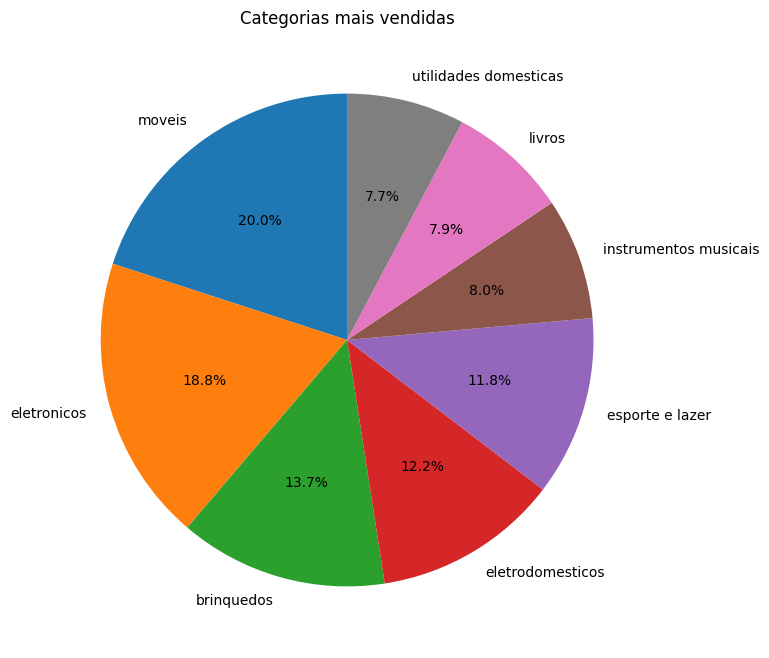

Podemos observar essa mesma tendencia de categorias mais e menos vendidas analisando por loja.

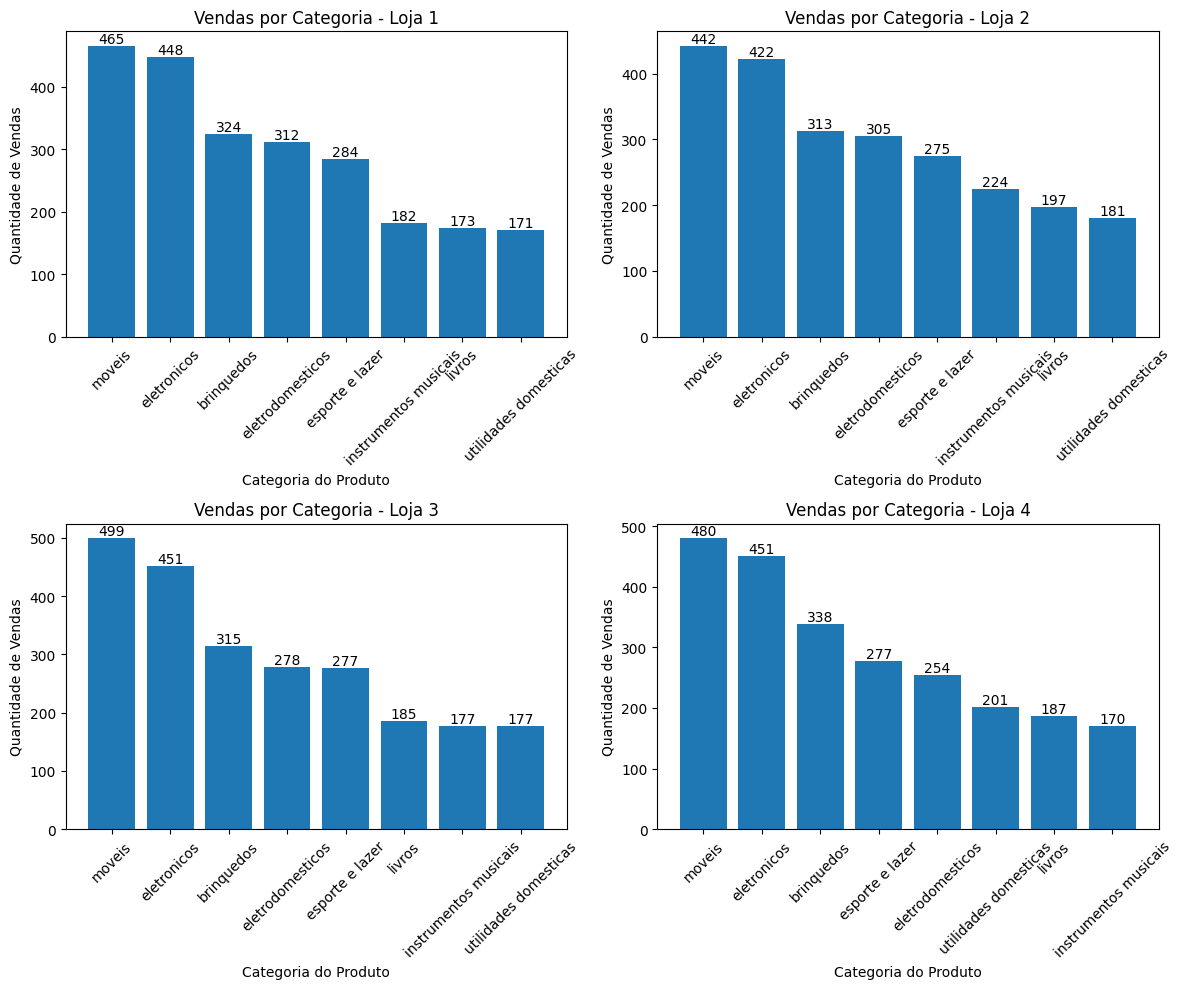

# **Produtos Mais e Menos Vendidos**

Com relação aos produtos mais vendidos e menos vendidos, temos uma variedade grande entre as lojas. Podemos observar nos gráficos abaixo para cada loja os 3 produtos mais vendidos (3 barras à esquerda) e os 3 produtos menos vendidos (3 barras à direita).

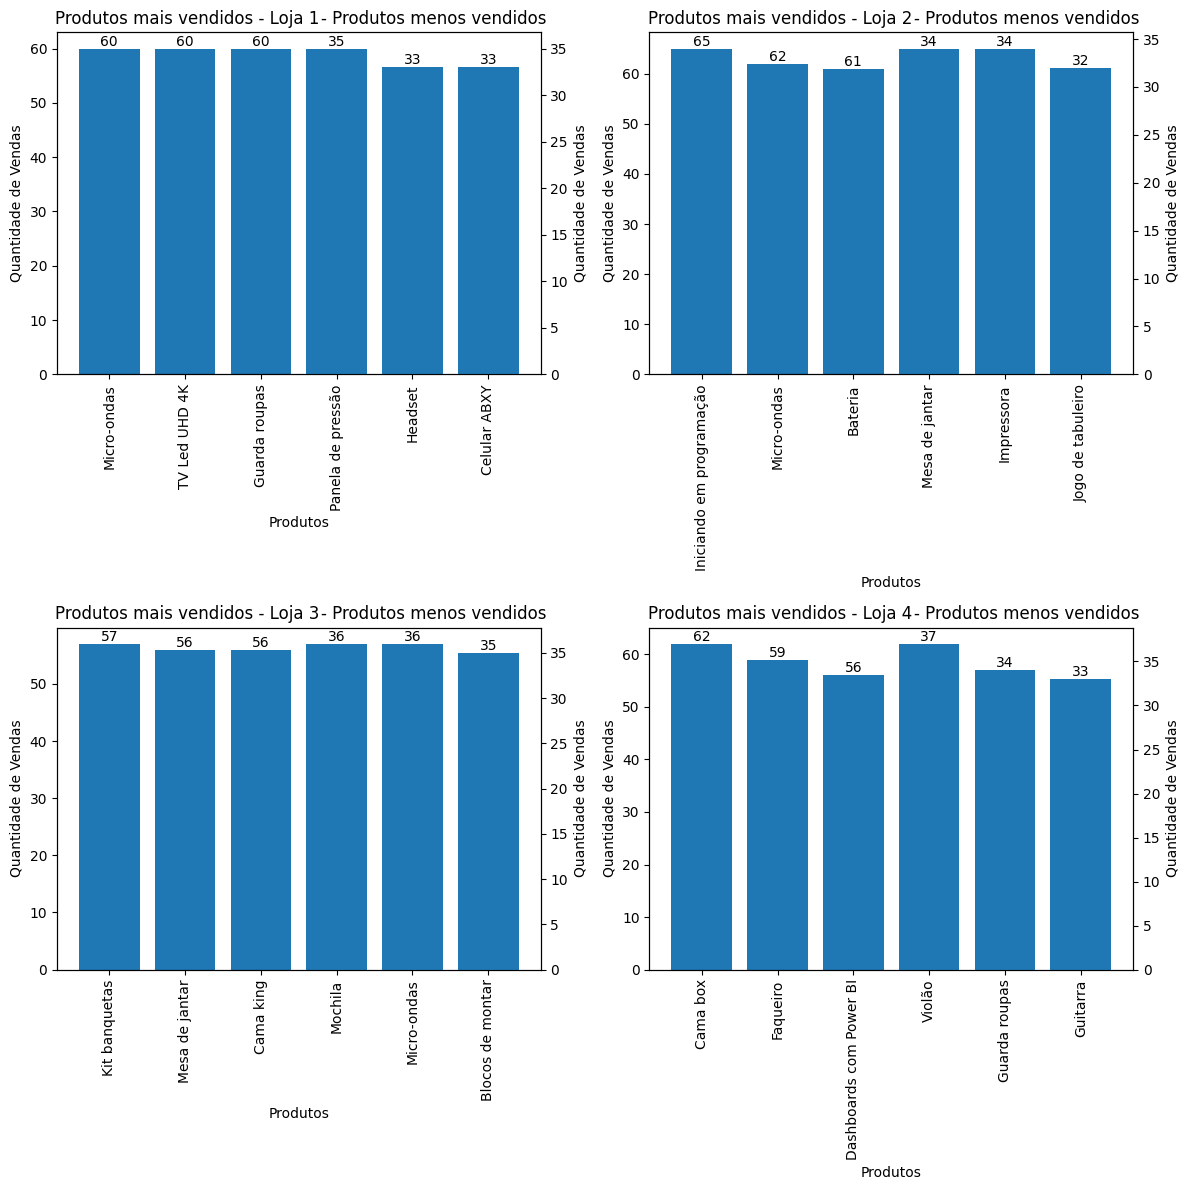

# **Média de Avaliação das Lojas**

As lojas com maiores médias de avaliação são as Lojas 2 e 3. Já as lojas com menor média são as Lojas 1 e 4. Novamente, observamos aqui a loja 4 em uma posição de pior desempenho em relação às outras. A loja 1, possui maior faturamento porém a pior média de avaliação, evidenciando que o atendimento ao cliente, entrega rápida, produtos de qualidade são item que precisam de atenção e melhorias para que haja uma melhora na satisfação do cliente.

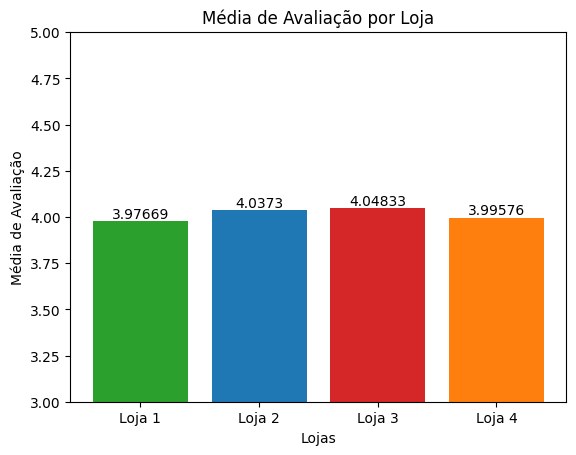

Analisando por último a distribuição geográfica dos produtos vendidos percebemos que, no geral, todas as lojas tem um perfil parecido de distribuição. Assim, ao vendermos a loja 4, as lojas restantes podem englobar a demanda da loja a ser vendida.

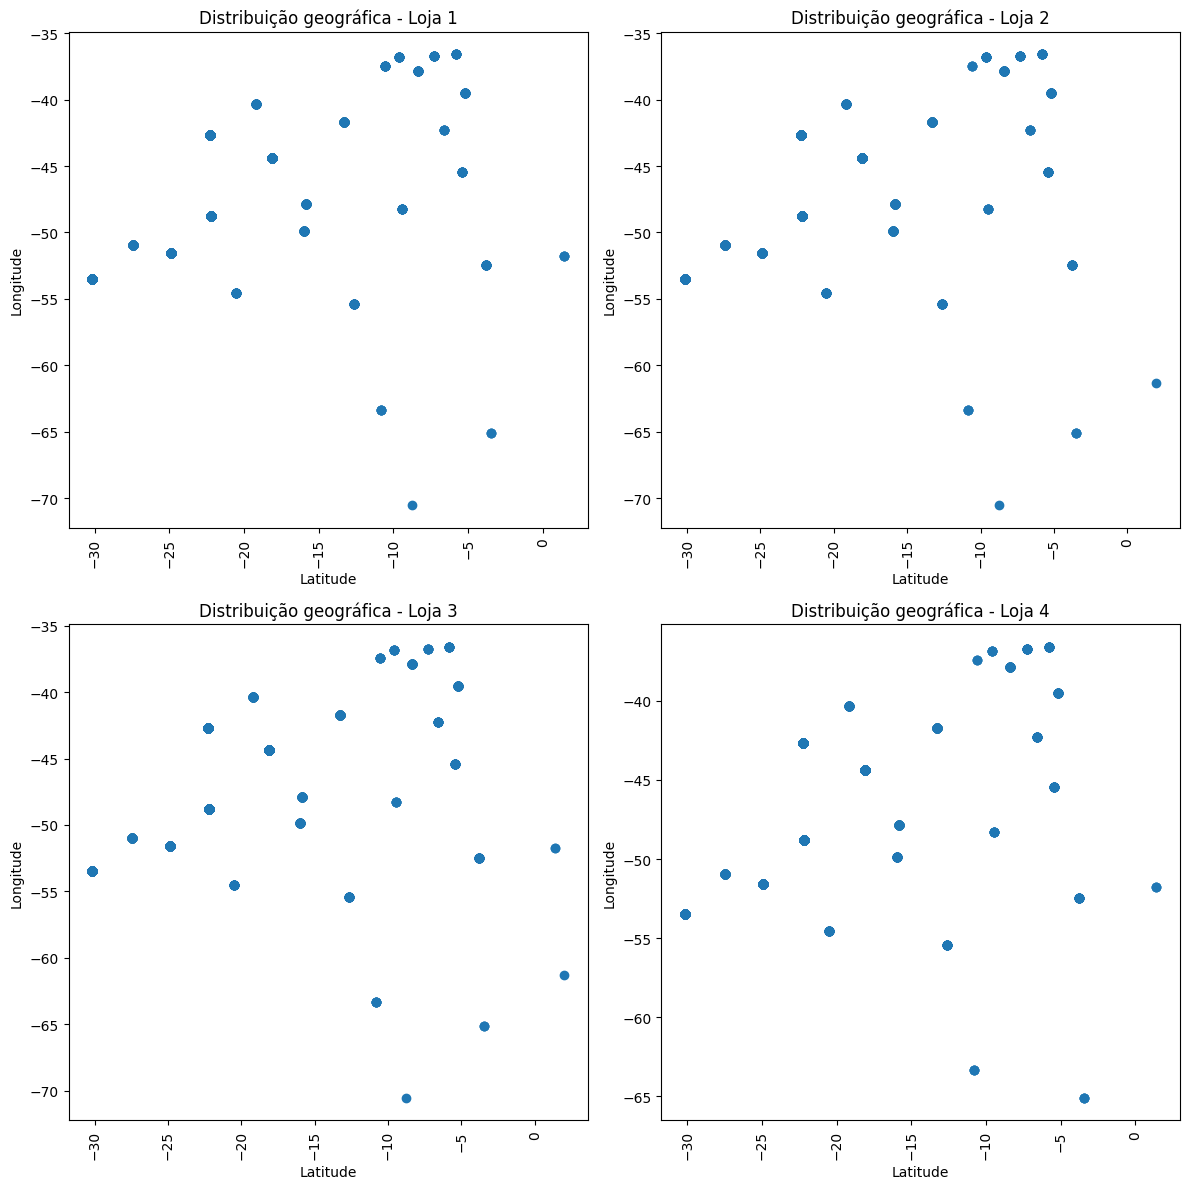

# **Conclusão**
## De acordo com o evidenciado nas análises feitas a partir dos dados das lojas e dos gráficos obtidos, sugere-se ao seu João vender a loja 4 visto que obteve os piores desempenhos em relação às demais lojas. Além disso, sugere-se uma avaliação mais aprofundada das demais lojas para que se melhore a logística, a distribuição de produtos vendidos e o atendimento ao cliente, e consequentemente o faturamento que apresenta uma tendência de queda.